In [1]:
## Importing Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt

Monte Carlo Simulation to Estimate Pi

## Introduction

Monte Carlo methods are a class of algorithms that rely on repeated random sampling to compute results. In this notebook, we will estimate the value of Pi (π) by performing a Monte Carlo simulation.

Consider a square with side length 2r that encloses a circle of radius r. By randomly generating points within the square and checking how many fall inside the circle, we can estimate π using the following relationship:

$$
\pi \approx 4 \times \frac{\text{{Number of points inside the circle}}}{\text{{Total number of points}}}
$$

This is because the area of the circle is $ \pi r^2 $, and the area of the square is $ (2r)^2 = 4r^2 $. Therefore, the ratio of the circle's area to the square's area is $ \pi / 4 $.


## Monte Carlo Function to Estimate Pi

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.use('TkAgg')  
# ## Generating Random Points

max_points = 10000  # Maximum number of points to generate per run
n_runs = 10  # Number of independent runs
x_all = np.random.uniform(0, 1, (n_runs, max_points))
y_all = np.random.uniform(0, 1, (n_runs, max_points))

# Store pi estimates for each run
pi_estimates_runs = np.zeros((n_runs, max_points))
means = np.zeros(max_points)
std_devs = np.zeros(max_points)

# ## Monte Carlo Function to Estimate Pi (Quarter Circle Only)

def estimate_pi_quarter(num_points, x_points, y_points):
    """
    Estimate Pi using Monte Carlo sampling in the first quadrant (quarter circle).
    
    Args:
        num_points: The number of points to sample.
        x_points: Array of x-coordinates.
        y_points: Array of y-coordinates.
        
    Returns:
        pi_estimate: The estimated value of Pi.
        inside_circle: A boolean array indicating if points are inside the quarter circle.
    """
    distances = np.sqrt(x_points**2 + y_points**2)
    inside_circle = distances <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_points
    return pi_estimate, inside_circle

# ## Running the Simulation

for run in range(n_runs):
    for i in range(1, max_points + 1):
        pi_estimates_runs[run, i - 1], _ = estimate_pi_quarter(i, x_all[run, :i], y_all[run, :i])

# Calculate mean and standard deviation at each point count
means = np.mean(pi_estimates_runs, axis=0)
std_devs = np.std(pi_estimates_runs, axis=0)

# ## Custom Dynamic Visualization of Points and Pi Estimation

# Update only the data of scatter and line objects
def update_plot(num_points, fill_std):
    # Update scatter plot for points inside and outside quarter circle
    x = x_all[0, :num_points]  # Show first run visually
    y = y_all[0, :num_points]
    _, inside_circle = estimate_pi_quarter(num_points, x, y)
    colors = np.where(inside_circle, 'green', 'red')
    scat.set_offsets(np.c_[x, y])
    scat.set_color(colors)

    # Update Pi estimation plot
    line_mean.set_data(range(1, num_points + 1), means[:num_points])
    
    # Clear previous fill and add new fill for std dev
    fill_std = ax2.fill_between(range(1, num_points + 1), 
                     means[:num_points] - std_devs[:num_points], 
                     means[:num_points] + std_devs[:num_points], 
                     color='gray', alpha=1)

    # Redraw the plots
    fig.canvas.draw()
    fig.canvas.flush_events()

plt.ion()
# Initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Set up the first plot (quarter circle)
ax1.set_title("Quarter Circle (First Quadrant)")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax1.add_artist(circle)
# Set up scatter plot for points
scat = ax1.scatter([], [], s=1)

# Set up the second plot (Pi estimation over time)
ax2.set_title("Estimation of Pi")
ax2.set_xlim(1, max_points)
ax2.set_ylim(2.5, 4)
ax2.set_xscale("log")
line_mean, = ax2.plot([], [], color='b', label='Mean Pi Estimate')
fill_std = ax2.fill_between([], [], [], color='gray', alpha=0.3, label='± 1 Std Dev')
ax2.axhline(y=np.pi, color='r', linestyle='-', label="True Pi")
ax2.legend()
# Custom loop to manually update the plot
num_points_plot = np.array([10**i for i in [1,1.5,2,2.5,3,3.5,4]],dtype=int)
for num_points in num_points_plot:  
    update_plot(num_points, fill_std)
    time.sleep(1)
# Turn off interactive mode
plt.ioff()
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

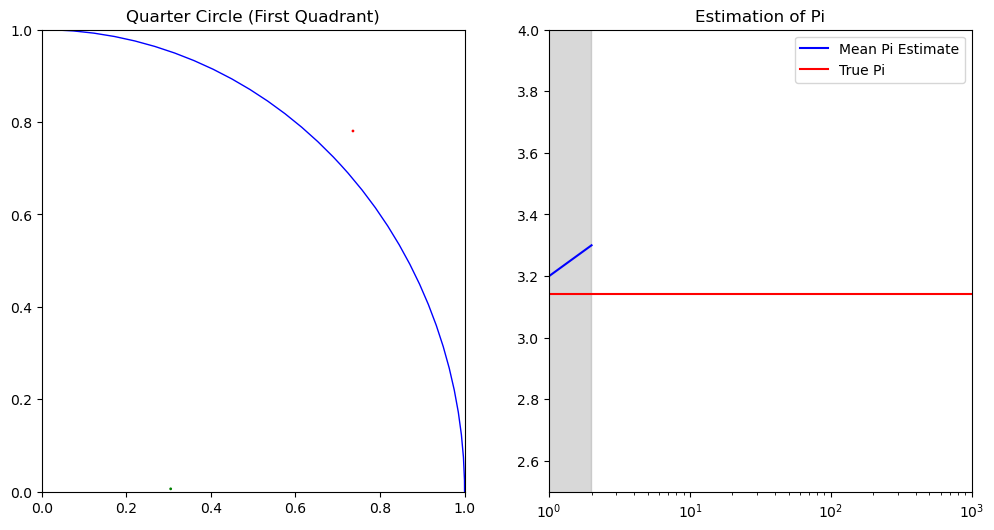

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation

# Parameters
max_points = 1000  # Maximum number of points
n_runs = 20  # Number of independent runs
x_all = np.random.uniform(0, 1, (n_runs, max_points))
y_all = np.random.uniform(0, 1, (n_runs, max_points))

# Store pi estimates for each run
pi_estimates_runs = np.zeros((n_runs, max_points))
means = np.zeros(max_points)
std_devs = np.zeros(max_points)

# Monte Carlo function to estimate Pi
def estimate_pi_quarter(num_points, x_points, y_points):
    distances = np.sqrt(x_points**2 + y_points**2)
    inside_circle = distances <= 1
    pi_estimate = 4 * np.sum(inside_circle) / num_points
    return pi_estimate, inside_circle

# Precompute Pi estimates
for run in range(n_runs):
    for i in range(1, max_points + 1):
        pi_estimates_runs[run, i - 1], _ = estimate_pi_quarter(i, x_all[run, :i], y_all[run, :i])

means = np.mean(pi_estimates_runs, axis=0)
std_devs = np.std(pi_estimates_runs, axis=0)

# Initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Quarter Circle Visualization
ax1.set_title("Quarter Circle (First Quadrant)")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
circle = Circle((0, 0), 1, color='blue', fill=False)
ax1.add_artist(circle)
scat = ax1.scatter([], [], s=1)

# Pi Estimation Plot
ax2.set_title("Estimation of Pi")
ax2.set_xlim(1, max_points)
ax2.set_ylim(2.5, 4)
ax2.set_xscale("log")
line_mean, = ax2.plot([], [], color='b', label='Mean Pi Estimate')
true_pi_line = ax2.axhline(y=np.pi, color='r', linestyle='-', label="True Pi")
fill_std = None  # Placeholder for standard deviation shading
ax2.legend()

# Update function for animation
def update(frame):
    num_points = frame + 1

    # Update scatter plot
    x = x_all[0, :num_points]
    y = y_all[0, :num_points]
    _, inside_circle = estimate_pi_quarter(num_points, x, y)
    colors = np.where(inside_circle, 'green', 'red')
    scat.set_offsets(np.c_[x, y])
    scat.set_color(colors)

    # Update mean Pi estimate plot
    line_mean.set_data(range(1, num_points + 1), means[:num_points])

    # Update standard deviation fill
    global fill_std
    if fill_std:
        fill_std.remove()
    fill_std = ax2.fill_between(
        range(1, num_points + 1),
        means[:num_points] - std_devs[:num_points],
        means[:num_points] + std_devs[:num_points],
        color='gray', alpha=0.3
    )

# Animation
ani = FuncAnimation(fig, update, frames=range(1, max_points), interval=100, repeat=False)

# Display the animation
# Display the animation inline in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation

# Parameters
max_points = 100000  # Maximum number of points
n_runs = 20  # Number of independent runs
x_all = np.random.uniform(0, 1, (n_runs, max_points))
y_all = np.random.uniform(0, 1, (n_runs, max_points))

# Precompute distances and inside_circle for all points
distances = np.sqrt(x_all**2 + y_all**2)
inside_circle = distances <= 1

# Precompute π estimates for all points and all runs
cumulative_inside_circle = np.cumsum(inside_circle, axis=1)
pi_estimates_runs = 4 * cumulative_inside_circle / np.arange(1, max_points + 1)

# Precompute means and standard deviations
means = np.mean(pi_estimates_runs, axis=0)
std_devs = np.std(pi_estimates_runs, axis=0)

# Initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Quarter Circle Visualization
ax1.set_title("Quarter Circle (First Quadrant)")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
circle = Circle((0, 0), 1, color='blue', fill=False)
ax1.add_artist(circle)
scat = ax1.scatter([], [], s=1)

# Pi Estimation Plot
ax2.set_title("Estimation of Pi")
ax2.set_xlim(1, max_points)
ax2.set_ylim(2.5, 4)
ax2.set_xscale("log")
line_mean, = ax2.plot([], [], color='b', label='Mean Pi Estimate')
true_pi_line = ax2.axhline(y=np.pi, color='r', linestyle='-', label="True Pi")
n = np.arange(1,max_points,1)
def theoretical_std_pi(n):
    return (4 / np.sqrt(n)) * np.sqrt((np.pi / 4) * (1 - np.pi / 4))
true_std = ax2.plot(n,theoretical_std_pi(n))
fill_std = ax2.fill_between([], [], [], color='gray', alpha=0.3)
ax2.legend()

# Update function for animation
def update(frame):
    num_points = frame + 1

    # Update scatter plot
    x = x_all[0, :num_points]
    y = y_all[0, :num_points]
    colors = np.where(inside_circle[0, :num_points], 'green', 'red')
    scat.set_offsets(np.c_[x, y])
    scat.set_color(colors)

    # Update mean Pi estimate plot
    line_mean.set_data(range(1, num_points + 1), means[:num_points])

    # Update standard deviation fill
    global fill_std
    fill_std.remove()
    fill_std = ax2.fill_between(
        range(1, num_points + 1),
        means[:num_points] - std_devs[:num_points],
        means[:num_points] + std_devs[:num_points],
        color='gray', alpha=0.3
    )

n_frames = 50  # Number of frames to show in the animation

# Generate a nonlinear frame progression
def nonlinear_frame_progression(n_frames, max_points):
    base = np.geomspace(1, max_points-1, n_frames // 2, dtype=int)  # Logarithmic-like steps
    fine = np.unique(np.linspace(1, max_points-1, n_frames // 2, dtype=int))  # Linear steps
    return np.unique(np.sort(np.concatenate((base, fine))))

frame_indices = nonlinear_frame_progression(n_frames, max_points)
# Animation
ani = FuncAnimation(fig, update, frames=frame_indices, interval=50, repeat=False)

# Display the animation inline in Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())
